<a href="https://colab.research.google.com/github/ThanikPimpiban/mulitivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ

    ข้อมูลโจทย์ อยู่ใน ตัวแปร Data
    
    ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

    ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

    เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.

    เขียน comments อธิบายทุกขั้นตอน

    อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist

    commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [1]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas 


In [2]:
Name = 'ธนิก พิมภิบาล'
ID = '6230210491'

In [3]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [4]:
Data = DataGenerator(Name,ID)

021:22:10


In [5]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,-4.537722,7.266307,8.277647,5.333037,0.135326,-6.602959,-2.569090,-2.460662,-3.458128,-0.661241,-0.192912,-6.031362,6.553900,4.776343,8.187041,-5.893913,2.695727,2.758724,-1.832187,-1.666498,5.323251,2.600428,14.532614,15.002138
1,9.048972,7.134933,1.759783,0.034717,8.250986,4.457631,-10.790035,3.649009,1.107221,0.736632,-0.457452,-1.781641,-5.243909,4.985990,5.103544,-6.044533,3.525429,3.263021,4.403556,-5.042170,-3.281565,-3.469476,14.269866,-15.347382
2,8.207557,9.221489,3.142432,-7.800994,-8.903069,-0.824537,-7.178304,-0.790042,-3.269673,-7.488747,-4.782331,-2.577739,3.474321,-4.071277,1.164568,-3.592699,-6.067020,-7.266478,-3.949880,-5.223433,-8.792920,5.637138,18.442977,30.185691
3,11.682951,6.281466,5.393395,-0.674409,8.594136,4.347096,-11.235947,3.894471,2.658678,0.185085,-2.813303,-1.443848,-3.635104,4.315976,3.645405,-6.312063,1.472157,4.238021,2.035570,-3.538829,-5.423032,-2.393155,12.562931,-9.965776
4,9.061801,0.086986,7.456516,7.835959,5.053796,9.440070,3.006729,-1.963116,-3.156712,7.647956,-7.566631,-1.521601,-4.194532,1.812146,7.602348,-3.924658,4.949151,5.064022,3.089132,-3.514878,5.411684,0.266841,0.173971,3.334206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.311523,-0.904654,9.165297,3.628016,-5.782000,-6.570243,7.230237,-1.185786,-1.942155,-7.232912,3.418986,7.572747,9.577475,-7.825424,7.149102,-6.908824,-2.450571,-4.185966,1.261364,1.958801,-0.121484,-1.554191,-1.809307,-5.770954
9996,7.842338,-0.796573,5.991055,7.505813,6.112663,8.112512,6.000871,0.037768,-5.231936,3.300707,-6.724084,-0.454427,-6.033146,4.417475,9.085679,-4.404652,5.987237,6.445583,0.887181,-6.112017,7.028998,-0.193996,-1.593146,1.030019
9997,-8.375086,-2.782101,4.931259,-10.261058,-5.846575,-8.975474,-4.501026,4.532442,-4.603057,1.470781,-8.752329,5.189381,-7.331412,-4.640731,0.670324,6.999508,3.641213,8.998121,6.776509,-2.721687,-2.565575,2.873913,-5.564201,16.369564
9998,0.764459,8.652329,-3.127344,7.200398,9.497322,5.160653,-6.298138,8.349976,-0.287924,8.751578,-7.162570,8.265871,5.223376,-6.629349,2.130710,-5.009280,-0.202760,0.205711,-8.487282,6.853373,8.010680,2.831422,17.304658,16.157111


## **เริ่มทำข้อสอบ**

## ข้อมูลใน Data

In [ ]:
import numpy as np   # import


In [111]:
Data.shape   ## ขนาดของ Data

(10000, 24)

In [112]:
Data.columns   # เรียกดู columns ของ Data

RangeIndex(start=0, stop=24, step=1)

In [113]:
Data.info()   # เรียกดูข้อมูลของ Data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  float64
 9   9       10000 non-null  float64
 10  10      10000 non-null  float64
 11  11      10000 non-null  float64
 12  12      10000 non-null  float64
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
 20  20      10000 non-null  float64
 21  21      10000 non-null  float64
 22 

In [402]:
Data.corr()  # เรียกดูความสัมพันธ์ของ Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1.000000,0.085070,-0.123768,0.276106,0.154489,0.665316,0.065969,-0.197921,0.466688,-0.273252,0.157509,-0.291208,-0.032088,0.481035,0.057294,-0.507272,-0.286925,-0.346305,-0.202634,-0.292418,-0.333260,-0.217970,0.085070,-0.217970
1,0.085070,1.000000,-0.041192,0.082638,0.503470,0.142443,-0.641824,0.507056,-0.174063,0.032859,-0.179840,-0.311310,0.090674,-0.014958,0.288805,-0.159752,-0.452769,-0.523865,-0.284118,0.098861,-0.001726,0.337688,1.000000,0.337688
2,-0.123768,-0.041192,1.000000,-0.181195,-0.155066,-0.290836,-0.195272,-0.075084,-0.343087,0.225933,0.147477,0.023545,-0.102563,0.134756,0.730300,0.280789,0.101082,0.072319,0.433255,-0.660511,0.373901,-0.128838,-0.041192,-0.128838
3,0.276106,0.082638,-0.181195,1.000000,0.484015,0.468532,0.464229,-0.224003,0.300698,0.012121,0.316477,-0.178057,0.283542,0.312276,0.127051,-0.581539,0.089406,0.011743,-0.285672,0.430887,0.330507,-0.148783,0.082638,-0.148783
4,0.154489,0.503470,-0.155066,0.484015,1.000000,0.671271,-0.325979,0.547816,0.181116,0.505789,-0.268493,-0.061072,-0.307293,0.222787,0.313195,-0.183679,0.241553,0.211861,-0.062492,0.172957,0.367567,-0.127662,0.503470,-0.127662
5,0.665316,0.142443,-0.290836,0.468532,0.671271,1.000000,-0.061694,0.195835,0.492922,0.352235,-0.240784,-0.036312,-0.263237,0.435186,0.151920,-0.331950,0.076949,0.053214,-0.306400,-0.091254,0.148948,-0.268102,0.142443,-0.268102
6,0.065969,-0.641824,-0.195272,0.464229,-0.325979,-0.061694,1.000000,-0.624877,0.009473,-0.291062,0.416150,0.003935,0.358374,-0.128788,-0.389539,-0.375037,0.251003,0.153307,0.104128,0.383424,0.028802,-0.252280,-0.641824,-0.252280
7,-0.197921,0.507056,-0.075084,-0.224003,0.547816,0.195835,-0.624877,1.000000,-0.148905,0.501269,-0.648289,0.437497,-0.357483,-0.404556,0.334750,0.375631,-0.119415,-0.063060,-0.037548,0.105597,0.219142,0.259009,0.507056,0.259009
8,0.466688,-0.174063,-0.343087,0.300698,0.181116,0.492922,0.009473,-0.148905,1.000000,-0.131488,0.192131,0.100354,-0.086500,0.611312,-0.076260,-0.214636,-0.067799,0.108558,-0.436275,0.021519,-0.203380,-0.148769,-0.174063,-0.148769
9,-0.273252,0.032859,0.225933,0.012121,0.505789,0.352235,-0.291062,0.501269,-0.131488,1.000000,-0.431964,0.456272,-0.231800,-0.081771,0.463577,0.239964,0.455915,0.407254,0.023109,-0.216552,0.807875,-0.319146,0.032859,-0.319146


**เช็คความสัมพันธ์ของ Data ที่มีค่า corr เท่ากัน**

In [116]:
for i in range(corr.shape[0]):        # ใช้ for loop เช็คความสัมพันธ์ของ Data ที่ corr เท่ากัน
        for j in range(corr.shape[1]):
            if (i !=j )  and (corr[i,j] == 1):
                print(f'row = {i} column = {j} corrcoef = {corr[i,j]}')


row = 1 column = 22 corrcoef = 1.0
row = 21 column = 23 corrcoef = 1.0
row = 22 column = 1 corrcoef = 1.0
row = 23 column = 21 corrcoef = 1.0


## ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

In [302]:
from sklearn.cluster import KMeans   ## เริ่มทำการ import ก่อน
import matplotlib.pyplot as plt          
from sklearn.decomposition import PCA


*define*


In [355]:
kmeans = KMeans()  ### กำหนด define 
pca1 = PCA()

*Fit-transform*

In [356]:
kmeans.fit(Data)   


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [357]:
new_pca_1 = pca1.fit_transform(Data) 

*คำนวณ*

In [ ]:
kmeans.cluster_centers_    #เรียกดูค่า k-mean center ในแต่ละ cluster

**ใช้ค่า Default**

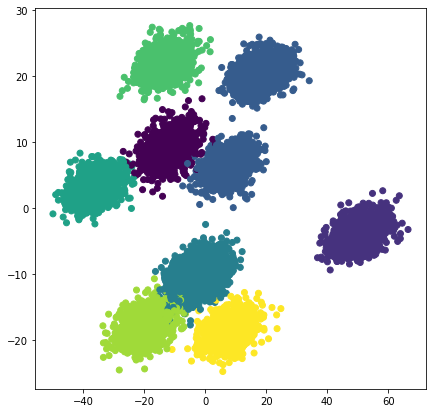

In [409]:
kmeans = KMeans()         
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca_1[:,0],new_pca_1[:,1],c=y)   # plot กราฟดูการกระจายของ Data

In [410]:
kmeans.cluster_centers_    #เรียกดูค่า k-mean center ในแต่ละ cluster

array([[ -4.57154455,   7.08738442,   8.3234325 ,   5.20553626,
          0.32660358,  -6.68023987,  -4.03845544,  -4.37812602,
         -3.40348696,  -0.80844149,   0.89612416,  -5.69266445,
          5.90578852,   4.58776431,   6.98900518,  -4.68770052,
          2.28868287,   2.93347883,  -2.21052242,  -1.83500352,
          6.19013265,   1.9960025 ,  14.17476884,  11.9800125 ],
       [ -0.06412901,  -4.51225673,   6.22253194,  -3.2269512 ,
         -6.08859379,  -3.17695728,   3.43639431,  -4.33873044,
         -4.73102557,   7.57278776,   0.75839827,   4.86441192,
          7.96178553,  -4.47805369,   0.68598681,  -7.36481561,
          9.21835902,   6.27049844,   3.05073206,  -5.97899453,
          9.45978479,  -9.28651114,  -9.02451347, -44.4325557 ],
       [  8.80198473,   3.34648887,   5.18750189,   3.27413701,
          7.04659023,   6.22988799,  -3.02861602,   1.27478968,
         -1.16380144,   2.97837899,  -4.22130928,  -2.31625961,
         -4.84934303,   3.63058511,   

**หาจำนวน cluster ที่เหมาะสมกับข้อมูลของเราด้วยวิธี Elbow Method**

In [411]:
SSE = list()        # สร้าง list ชื่อว่า SSE      ### เพื่อหาค่า Sum of Squared Errors
for k in [1,2,3,4,5,6,7,8]:    # for loop ตัวแปร k ตั้งแต่ 1-8  
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [412]:
SSE #ค่า Sum of Squared Errors

[11966550.962678483,
 8596940.011299517,
 6729889.143185041,
 5234830.487597061,
 3908724.9400010095,
 2885596.483636631,
 2210026.7534305393,
 1586022.791622691]

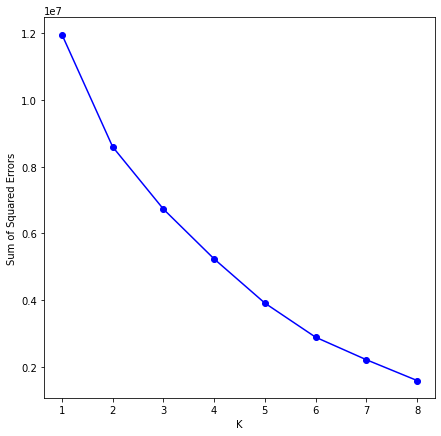

In [413]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')  # plot กราฟแสดงค่า Sum of Squared Errors
plt.xlabel('K')  ## กำหนดให้แกน X ชื่อ "K"
plt.ylabel('Sum of Squared Errors'); ## กำหนดให้แกน Y ชื่อ "Sum of Squared Errors"


In [414]:
kmeans.inertia_    ## ผลรวมของระยะทางกำลังสองของตัวอย่างไปยังศูนย์กลางคลัสเตอร์ที่ใกล้ที่สุด

1586022.791622691

**ในที่นี้เลือก cluster = 2 กลุ่ม**

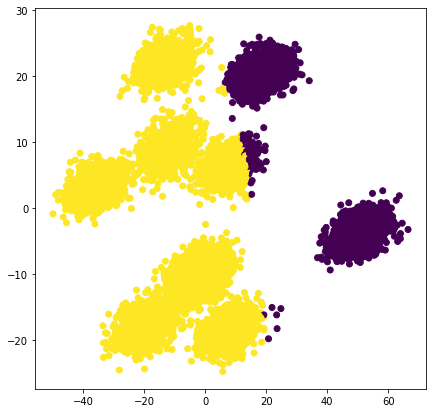

In [415]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca_1[:,0],new_pca_1[:,1],c=y) # plot กราฟดูการกระจายของ Data แต่มี cluster เป็น 2 กลุ่ม

In [416]:
kmeans.cluster_centers_      #เรียกดูค่า k-mean center ที่ได้กำหนด cluster ให้แล้ว

array([[  4.94437299,   1.0747713 ,   5.07868553,  -1.43730421,
          1.34065516,   1.14127649,  -2.86198471,  -0.50567614,
         -1.69129741,   3.70323664,  -0.62109618,   0.93292146,
          1.45049351,   0.55414072,   2.77597954,  -6.89418095,
          7.12054404,   5.96308979,   3.83180573,  -5.64808347,
          3.17094454,  -6.59928657,   2.1495426 , -30.99643284],
       [  1.43785262,   2.20831045,   2.12020016,   1.59380516,
         -1.26868759,  -2.18277409,   0.80298864,  -0.80932857,
         -2.8201907 ,  -2.52670618,  -3.25664712,   0.32918072,
          2.28202949,  -2.82022267,   0.70860608,  -4.12372035,
          1.36680319,   1.98774228,  -0.65115324,   0.04246246,
         -0.17937757,   1.64799993,   4.41662089,  10.23999964]])

## ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

In [417]:
from sklearn.cluster import KMeans   ## เริ่มทำการ import ก่อน
import matplotlib.pyplot as plt          
from sklearn.manifold import MDS


*Define*

In [425]:
model = MDS(n_components=2)

Fit

In [430]:
out = model.fit_transform(Data)

KeyboardInterrupt: ignored

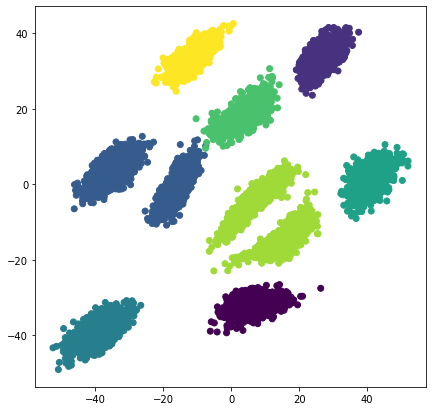

In [426]:
kmeans = KMeans()
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(out[:, 0], out[:, 1],c=y)  # plot กราฟดูการกระจายของ Data ที่ถูกลด Dimension

In [427]:
kmeans.cluster_centers_  #เรียกดูค่า k-mean center ในแต่ละ cluster

array([[  8.59797036,  -5.02550872,  -5.92928134,   6.32879498,
         -3.91784839,   3.5528448 ,   8.47547941,  -8.61236091,
          5.61401293,  -9.31349605,   0.17888189,  -1.24653385,
          3.82141373,   5.57711842,  -9.08842409,  -8.5670001 ,
          2.0995067 ,   4.27367797,  -6.97536301,   2.26370578,
         -7.0325493 ,  -0.7841479 , -10.05101744,  -1.9207395 ],
       [  7.91353391,   8.48540784,   2.39496859,  -7.22897205,
         -7.23906295,  -2.6581436 ,  -7.7109112 ,   0.25273127,
         -4.84444139,  -7.7432413 ,  -6.25724399,  -3.50975948,
          3.27315531,  -3.78323975,   0.44644512,  -3.33027584,
         -8.23765384,  -8.2015803 ,  -4.92591782,  -5.69417139,
         -8.75270938,   5.5450271 ,  16.97081568,  29.72513552],
       [  8.80198473,   3.34648887,   5.18750189,   3.27413701,
          7.04659023,   6.22988799,  -3.02861602,   1.27478968,
         -1.16380144,   2.97837899,  -4.22130928,  -2.31625961,
         -4.84934303,   3.63058511,   

**หาจำนวน cluster ที่เหมาะสมกับข้อมูลของเราด้วยวิธี Elbow Method**

In [384]:
SSE = list()        # สร้าง list ชื่อว่า SSE      ### เพื่อหาค่า Sum of Squared Errors
for k in [1,2,3,4,5,6,7,8]:    # for loop ตัวแปร k ตั้งแต่ 1-8  
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [385]:
SSE #ค่า Sum of Squared Errors

[11966550.962678483,
 8596940.011299517,
 6729889.143185041,
 5234830.487597061,
 3908724.9400010095,
 2885596.483636631,
 2210026.7534305393,
 1586022.791622691]

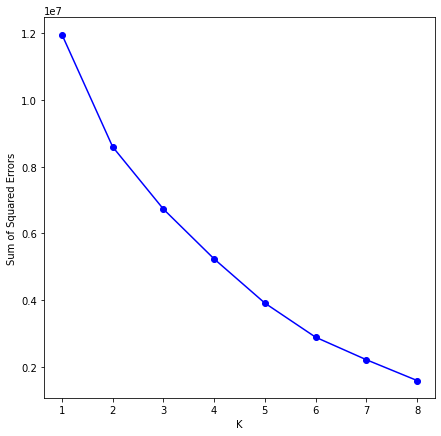

In [428]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')  # plot กราฟแสดงค่า Sum of Squared Errors
plt.xlabel('K')  ## กำหนดให้แกน X ชื่อ "K"
plt.ylabel('Sum of Squared Errors'); ## กำหนดให้แกน Y ชื่อ "Sum of Squared Errors"

In [429]:
kmeans.inertia_   ## ผลรวมของระยะทางกำลังสองของตัวอย่างไปยังศูนย์กลางคลัสเตอร์ที่ใกล้ที่สุด

1586022.791622691

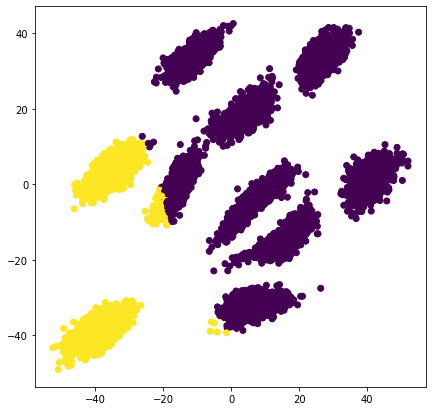

In [388]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(out[:,0],out[:,1],c=y) # plot กราฟดูการกระจายของ Data แต่มี cluster เป็น 2 กลุ่ม

In [391]:
kmeans.cluster_centers_    #เรียกดูค่า k-mean center ในแต่ละ cluster 

array([[  1.43785262,   2.20831045,   2.12020016,   1.59380516,
         -1.26868759,  -2.18277409,   0.80298864,  -0.80932857,
         -2.8201907 ,  -2.52670618,  -3.25664712,   0.32918072,
          2.28202949,  -2.82022267,   0.70860608,  -4.12372035,
          1.36680319,   1.98774228,  -0.65115324,   0.04246246,
         -0.17937757,   1.64799993,   4.41662089,  10.23999964],
       [  4.94437299,   1.0747713 ,   5.07868553,  -1.43730421,
          1.34065516,   1.14127649,  -2.86198471,  -0.50567614,
         -1.69129741,   3.70323664,  -0.62109618,   0.93292146,
          1.45049351,   0.55414072,   2.77597954,  -6.89418095,
          7.12054404,   5.96308979,   3.83180573,  -5.64808347,
          3.17094454,  -6.59928657,   2.1495426 , -30.99643284]])

## เปรียบเทียบความแตกต่าง

**กราฟการกระจายของข้อมูลที่ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ**

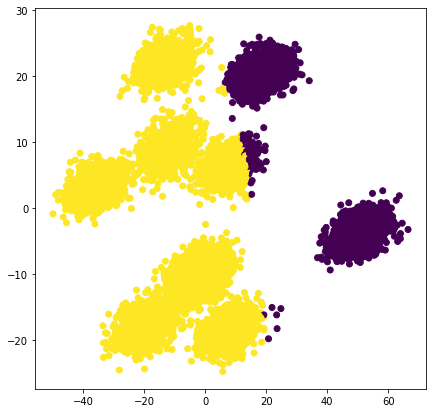

In [395]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca_1[:,0],new_pca_1[:,1],c=y) # plot กราฟดูการกระจายของ Data แต่มี cluster เป็น 2 กลุ่ม


**กราฟการกระจายของข้อมูลที่ ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ**

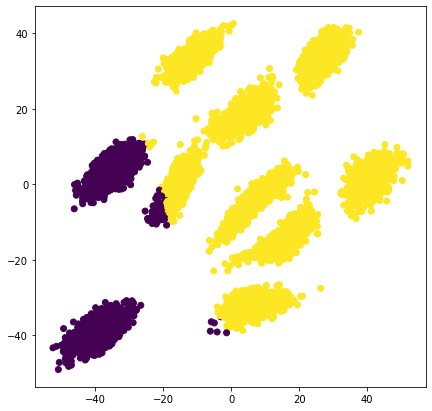

In [396]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(out[:,0],out[:,1],c=y)   # plot กราฟดูการกระจายของ Data ที่ถูกลด Dimension แต่มี cluster เป็น 2 กลุ่ม

**ตอบ** *กราฟทั้ง 2 มีความแตกต่างตรงที่การกระจายของข้อมูล ถึงจะแบ่งกลุ่มออกเป็น 2 กลุ่ม แต่กราฟที่ได้ก็มีหน้าตาที่ไม่เหมือนกัน เนื่องจากมีการถูกลด Dimension*